In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = pd.read_csv('./data.csv')
data.head()

,sleep,class,study,activity,happiness,performance
0,2,10,7,10,3,68
1,2,14,9,9,0,87
2,3,3,11,6,5,49
3,10,14,11,1,7,79
4,9,5,8,4,9,54


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   sleep        10000 non-null  int64
 1   class        10000 non-null  int64
 2   study        10000 non-null  int64
 3   activity     10000 non-null  int64
 4   happiness    10000 non-null  int64
 5   performance  10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


### Converting Categorical Features to Numerical

In [5]:

data_copy = data.copy()


In [6]:
data_copy.describe()

,sleep,class,study,activity,happiness,performance
count,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000
mean,10.071900,7.99220,7.95060,5.502800,5.004100,50.288000
std,5.497504,4.31029,4.32507,2.874199,3.156942,28.543748
min,1.000000,1.00000,1.00000,1.000000,0.000000,1.000000
25%,5.000000,4.00000,4.00000,3.000000,2.000000,26.000000
50%,10.000000,8.00000,8.00000,5.000000,5.000000,50.000000
75%,15.000000,12.00000,12.00000,8.000000,8.000000,75.000000
max,19.000000,15.00000,15.00000,10.000000,10.000000,100.000000


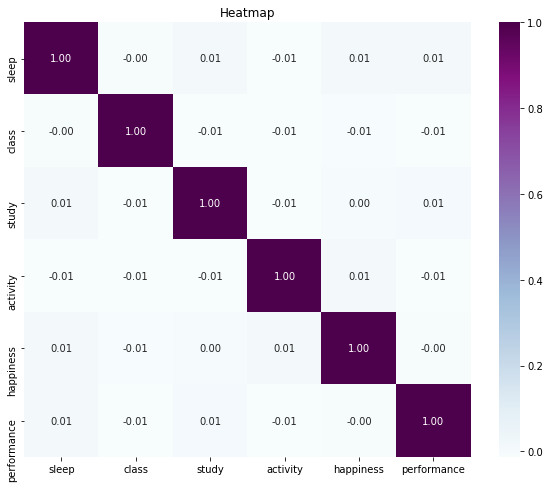

In [7]:
corr = data_copy.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr,cmap='BuPu',annot=True,fmt=".2f",ax=ax)
plt.title("Heatmap")
plt.savefig('./')
plt.show()

Text(0.5, 1.0, 'Happiness vs performance')

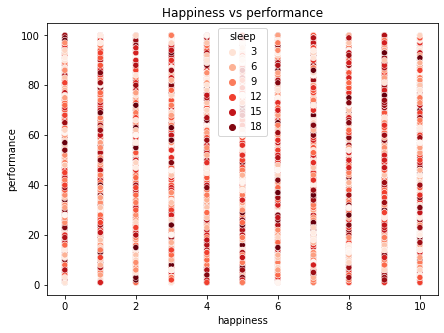

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='happiness',y='performance',hue='sleep',data=data_copy,palette='Reds')
plt.title('Happiness vs performance')

In [12]:
X = data_pre.drop('performance',axis=1).values
y = data_pre['performance'].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print('Size of X_train : ', X_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', X_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (8000, 5)
Size of y_train :  (8000, 1)
Size of X_test :  (2000, 5)
Size of Y_test :  (2000, 1)


## Importing Libraries

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV

## Linear Regression

In [14]:
%%time
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

CPU times: user 5.89 ms, sys: 288 µs, total: 6.17 ms
Wall time: 27.8 ms


In [15]:
cv_linear_reg = cross_val_score(estimator = linear_reg, X = X, y = y, cv = 10)

y_pred_linear_reg_train = linear_reg.predict(X_train)
r2_score_linear_reg_train = r2_score(y_train, y_pred_linear_reg_train)

y_pred_linear_reg_test = linear_reg.predict(X_test)
r2_score_linear_reg_test = r2_score(y_test, y_pred_linear_reg_test)

rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_reg_test)))

print('CV Linear Regression : {0:.3f}'.format(cv_linear_reg.mean()))
print('R2_score (train) : {0:.3f}'.format(r2_score_linear_reg_train))
print('R2_score (test) : {0:.3f}'.format(r2_score_linear_reg_test))
print('RMSE : {0:.3f}'.format(rmse_linear))

CV Linear Regression : -0.001
R2_score (train) : 0.001
R2_score (test) : -0.002
RMSE : 28.743
